# Construction of IO dataset for OPF BBMS

In this notebook, we aim at constructing


In [1]:
# Importing libraries
import os
from pathlib import Path
import dill as pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

import greyboxmodels.cpsmodels.physical.electrical.PowerFlowPowerGrid as PG
import greyboxmodels.cpsmodels.Plant as Plant

# Set the working directory
os.chdir("D:/projects/IPTLC_BBMs")
print(f"Current working directory: {os.getcwd()}")

Current working directory: D:\projects\IPTLC_BBMs


In [2]:
# Data folder path
data_folder = Path("D:/projects/Hierarchical_CPS_models/data/simulations/controlled_pg/20240226_184851/")

# Target simulation
target_simulation = "simulation_0.pkl"
target_simulation = data_folder / target_simulation

# Specify the path to save the processed data and create the folder if it doesn't exist
processed_data_folder = Path("data/OPF/") / data_folder.name
os.makedirs(processed_data_folder, exist_ok=True)

# Print the folders
print(f"Data folder: {data_folder}")
print(f"Target simulation: {target_simulation}")
print(f"Processed data folder: {processed_data_folder}")

Data folder: D:\projects\Hierarchical_CPS_models\data\simulations\controlled_pg\20240226_184851
Target simulation: D:\projects\Hierarchical_CPS_models\data\simulations\controlled_pg\20240226_184851\simulation_0.pkl
Processed data folder: data\OPF\20240226_184851


In [3]:
# Open the data
with open(target_simulation, "rb") as f:
    sim_data = pickle.load(f)

sim_data.keys()

dict_keys(['time', 'external_stimuli', 'state', 'step_data', 'plant'])

In [4]:
sim_data['step_data'][0].keys() # CC input: 'cc_input'. CC output: 'pg_control_input'

dict_keys(['time', 'state_pre_update', 'state_post_update', 'power_demands', 'cc_input', 'opf_cost', 'pg_control_input', 'pg_response', 'power_grid_step_data', 'control_center_step_data'])

In [5]:
# Open the plant
with open(data_folder / "plant.pkl", "rb") as f:
    plant = pickle.load(f)

plant

In [6]:
# Get the power grid and the control center
power_grid = plant.power_grid
control_center = plant.control_center

In [7]:
# Get the name of the states
# name_mapping = {'Pd': 'Active power demand',
#                 'Qd': 'Reactive power demand',
#                 'Pg': 'Active power generation',
#                 'Qg': 'Reactive power generation',
#                 'Vm': 'Voltage magnitude',
#                 'Va': 'Voltage angle',
#                 'ILine': 'Line current',
#                 'LTrafo': 'Transformer loading',
#                 'piGen': 'Generator status',
#                 'piLine': 'Line status',
#                 'piTrafo': 'Transformer status'}
name_mapping = None

pg_states = Plant.get_variables_names(plant.power_grid.state_idx, name_mapping)
pg_ext_stims = Plant.get_variables_names(plant.power_grid.uncontrolled_inputs_idx, name_mapping)
pg_cont_inputs = Plant.get_variables_names(plant.power_grid.controlled_inputs_idx, name_mapping)

cc_states = Plant.get_variables_names(plant.control_center.state_idx, name_mapping)
cc_cont_inputs = Plant.get_variables_names(plant.control_center.controlled_inputs_idx, name_mapping)

print(f"Power grid states: {pg_states}\n")
print(f"Power grid external stimuli: {pg_ext_stims}\n")
print(f"Power grid control inputs: {pg_cont_inputs}\n")

print(f"Control center states: {cc_states}\n")
print(f"Control center control inputs: {cc_cont_inputs}\n")

Power grid states: ['Pd 0', 'Pd 1', 'Pd 2', 'Pd 3', 'Pd 4', 'Pd 5', 'Pd 6', 'Pd 7', 'Pd 8', 'Pd 9', 'Pd 10', 'Qd 0', 'Qd 1', 'Qd 2', 'Qd 3', 'Qd 4', 'Qd 5', 'Qd 6', 'Qd 7', 'Qd 8', 'Qd 9', 'Qd 10', 'Pg 0', 'Pg 1', 'Pg 2', 'Pg 3', 'Pg 4', 'Qg 0', 'Qg 1', 'Qg 2', 'Qg 3', 'Qg 4', 'Vm 0', 'Vm 1', 'Vm 2', 'Vm 3', 'Vm 4', 'Vm 5', 'Vm 6', 'Vm 7', 'Vm 8', 'Vm 9', 'Vm 10', 'Vm 11', 'Vm 12', 'Vm 13', 'Va 0', 'Va 1', 'Va 2', 'Va 3', 'Va 4', 'Va 5', 'Va 6', 'Va 7', 'Va 8', 'Va 9', 'Va 10', 'Va 11', 'Va 12', 'Va 13', 'ILine 0', 'ILine 1', 'ILine 2', 'ILine 3', 'ILine 4', 'ILine 5', 'ILine 6', 'ILine 7', 'ILine 8', 'ILine 9', 'ILine 10', 'ILine 11', 'ILine 12', 'ILine 13', 'ILine 14', 'LTrafo 0', 'LTrafo 1', 'LTrafo 2', 'LTrafo 3', 'LTrafo 4', 'piGen 0', 'piGen 1', 'piGen 2', 'piGen 3', 'piGen 4', 'piLine 0', 'piLine 1', 'piLine 2', 'piLine 3', 'piLine 4', 'piLine 5', 'piLine 6', 'piLine 7', 'piLine 8', 'piLine 9', 'piLine 10', 'piLine 11', 'piLine 12', 'piLine 13', 'piLine 14', 'piTrafo 0', 'piTraf

In [10]:
sim_data['step_data'][0]['control_center_step_data'].keys()

dict_keys(['opf_options', 'opf_input', 'opf_output'])

In [19]:
# Get inputs and outputs
opf_inputs = np.array([x['control_center_step_data']["opf_input"] for x in sim_data['step_data']])
opf_outputs = np.array([x['control_center_step_data']["opf_output"] for x in sim_data['step_data']])

# Shapes
print(f"CC inputs shape: {opf_inputs.shape}")
print(f"CC outputs shape: {opf_outputs.shape}")

CC inputs shape: (384, 51)
CC outputs shape: (384, 9)


In [27]:
# Create a function that receives a path to a simulation and returns the inputs and outputs
def get_opf_data(filepath: Path):
    # Open the data
    with open(filepath, "rb") as f:
        sim_data = pickle.load(f)

    # Get the inputs and outputs
    opf_inputs = np.array([x['control_center_step_data']["opf_input"] for x in sim_data['step_data']])
    opf_outputs = np.array([x['control_center_step_data']["opf_output"] for x in sim_data['step_data']])

    return opf_inputs, opf_outputs

# Test the function
opf_inputs, opf_outputs = get_opf_data(target_simulation)
print(f"Testing the file: {target_simulation}")
print(f"CC inputs shape: {opf_inputs.shape}")
print(f"CC outputs shape: {opf_outputs.shape}")

Testing the file: D:\projects\Hierarchical_CPS_models\data\simulations\controlled_pg\20240226_184851\simulation_0.pkl
CC inputs shape: (384, 51)
CC outputs shape: (384, 9)


In [29]:
# Now, a function that iterates over all the simulations and returns the inputs and outputs in a single numpy array
def get_opf_data_all(data_folder: Path):
    # Create an empty list to store the inputs and outputs
    inputs = []
    outputs = []

    # Create a list of the target folders: they are called "simulation_0.pkl", "simulation_1.pkl", etc.
    target_folders = [f for f in data_folder.iterdir() if f.is_file() and f.name.startswith("simulation")]

    # Iterate over all the simulations and get the inputs and outputs for each one
    for f in tqdm.tqdm(target_folders):
        # Get the inputs and outputs
        opf_inputs, opf_outputs = get_opf_data(f)

        # Append the inputs and outputs to the lists
        inputs.append(opf_inputs)
        outputs.append(opf_outputs)

    # Concatenate the inputs and outputs
    inputs_matrix = np.concatenate(inputs, axis=0)
    outputs_matrix = np.concatenate(outputs, axis=0)

    # Get the plant
    with open(data_folder / "plant.pkl", "rb") as f:
        plant = pickle.load(f)

    return inputs_matrix, outputs_matrix, plant

# Test the function
opf_inputs, opf_outputs, plant = get_opf_data_all(data_folder)
print(f"CC inputs shape: {opf_inputs.shape}")
print(f"CC outputs shape: {opf_outputs.shape}")

100%|██████████| 6/6 [00:06<00:00,  1.14s/it]

CC inputs shape: (2304, 51)
CC outputs shape: (2304, 9)


In [30]:
# Save the inputs and outputs to numpy arrays
inputs_path = processed_data_folder / "opf_inputs.npy"
outputs_path = processed_data_folder / "opf_outputs.npy"

np.save(inputs_path, opf_inputs)
np.save(outputs_path, opf_outputs)

## Normalize the inputs and outputs

In [31]:
# Min-max normalization of inputs: where min and max are equal, min is set to val - 1 and max is set to val
min_opf_input = opf_inputs.min(axis=0)
max_opf_input = opf_inputs.max(axis=0)

min_opf_input[min_opf_input == max_opf_input] = min_opf_input[min_opf_input == max_opf_input] - 1
max_opf_input[min_opf_input == max_opf_input] = max_opf_input[min_opf_input == max_opf_input]

opf_inputs_normalized = (opf_inputs - min_opf_input) / (max_opf_input - min_opf_input)

opf_inputs_normalized[:5, :]

array([[0.29750281, 0.35965536, 0.3268308 , 0.27394017, 0.2756491 ,
        0.31066581, 0.30135664, 0.26740002, 0.16411116, 0.25340208,
        0.31547848, 0.3478262 , 0.37259075, 0.76018325, 0.35224967,
        0.29208127, 0.34078505, 0.29565497, 0.27776082, 0.41155644,
        0.42133716, 0.22754608, 0.5040446 , 0.48579659, 1.        ,
        0.64864493, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.15850434, 0.29303444, 0.28664544, 0.31820367, 0.32617465,
        0.34998045, 0.41455455, 0.20307105, 0.18981878, 0.30296366,
        0.27112885, 0.34834277, 0.30971364, 0.7886959 , 0.35942683,
        0.2950958 , 0.23026987, 0.22841501, 0.12234162, 0.37382549,
        0.46626737, 0.26991

In [32]:
# Min-max normalization of outputs is done in the same way
min_opf_output = opf_outputs.min(axis=0)
max_opf_output = opf_outputs.max(axis=0)

min_opf_output[min_opf_output == max_opf_output] = min_opf_output[min_opf_output == max_opf_output] - 1
max_opf_output[min_opf_output == max_opf_output] = max_opf_output[min_opf_output == max_opf_output]

opf_outputs_normalized = (opf_outputs - min_opf_output) / (max_opf_output - min_opf_output)

opf_outputs_normalized[:5, :]

array([[1.00000000e+00, 5.97994106e-01, 3.79131882e-01, 4.97965425e-07,
        5.04044596e-01, 4.85796590e-01, 4.03716526e-01, 9.70440232e-01,
        9.99861350e-01],
       [1.00000000e+00, 6.41608965e-01, 3.39337410e-01, 4.62315130e-07,
        4.04072630e-01, 3.79438762e-01, 2.99968204e-01, 9.53566153e-01,
        9.82583476e-01],
       [1.00000000e+00, 6.17687174e-01, 3.56565365e-01, 5.69677301e-07,
        4.17476441e-01, 3.87189744e-01, 2.95796217e-01, 9.46819658e-01,
        9.72680710e-01],
       [1.00000000e+00, 6.33545504e-01, 3.41153532e-01, 4.73392495e-07,
        3.92878971e-01, 3.62537236e-01, 2.88781022e-01, 9.50970104e-01,
        9.73370456e-01],
       [1.00000000e+00, 6.72169549e-01, 3.10159029e-01, 2.60514300e-07,
        3.88394425e-01, 3.68987750e-01, 3.06824500e-01, 9.80852036e-01,
        9.99747545e-01]])

In [33]:
# Save the normalized inputs and outputs to numpy arrays
inputs_normalized_path = processed_data_folder / "opf_inputs_minmax_normalized.npy"
outputs_normalized_path = processed_data_folder / "opf_outputs_minmax_normalized.npy"

np.save(inputs_normalized_path, opf_inputs_normalized)
np.save(outputs_normalized_path, opf_outputs_normalized)

# Also, save the min and max values
min_max_values = {"min_opf_input": min_opf_input,
                  "max_opf_input": max_opf_input,
                  "min_opf_output": min_opf_output,
                  "max_opf_output": max_opf_output}

min_max_values_path = processed_data_folder / "norm_min_max_values.pkl"
with open(min_max_values_path, "wb") as f:
    pickle.dump(min_max_values, f)

# LEGACY CODE BELOW

## Input

The input is the concatenation of the external stimuli and the discrete part of the condition of the system

In [30]:
class BBM_single_input:
    def __init__(self):
        self.description = """The input is the concatenation of the external stimuli and the discrete part of the condition of the system.
        """

    @staticmethod
    def run(u: pd.DataFrame, theta: pd.DataFrame):
        """
        Returns the input of the BBM given the external stimuli and the discrete part of the condition
        :param u: the external stimuli dataframe
        :param theta: the condition dataframe
        :return:
        """
        # Get the discrete part of the condition
        theta_pi_df = theta.loc[:, theta.columns.str.contains("pi") & ~theta.columns.str.contains("piBus|piLoad")]

        # Concatenate the external stimuli and the discrete part of the condition
        x = pd.concat((u, theta_pi_df), axis=1) # side by side

        return x

    @staticmethod
    def normalize(x, plant):
        """
        Normalizes the input
        :param x:
        :return:
        """
        # copy the input
        x = x.copy()

        # Get the IEEE14 nominal values
        from res.models.physical.electrical.cases import get_case14_loads
        case14_loads = get_case14_loads()
        Pnom = case14_loads[0, :]
        Qnom = case14_loads[1, :]

        # Normalize all the active power loads. If Pnoom is zero, place a 0
        Pd = x.loc[:, x.columns.str.contains("Pd")]
        Pdnorm = Pd / Pnom
        Pdnorm.fillna(0, inplace=True)

        # Normalize all the reactive power loads
        Qd = x.loc[:, x.columns.str.contains("Qd")]
        Qdnorm = Qd / Qnom
        Qdnorm.fillna(0, inplace=True)

        # Place in the input
        x.loc[:, x.columns.str.contains("Pd")] = Pdnorm
        x.loc[:, x.columns.str.contains("Qd")] = Qdnorm

        return x

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [51]:
# Create an input
OPF_input_test = BBM_single_input.run(sim_u_df, sim_theta_df)
OPF_input_test.head()

,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4
0,0.0,14.556323,47.123383,22.191755,4.712971,7.289077,0.0,0.0,13.082205,5.084837,1.952913,3.102880,9.038774,9.476645,0.0,7.028518,12.763807,-2.247910,1.048428,5.155498,0.0,0.0,7.717014,3.033411,0.721996,0.950130,2.958551,3.101872,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,13.968725,50.224851,27.714751,4.644591,4.736703,0.0,0.0,12.766659,5.637937,2.097461,2.600310,9.037949,7.823731,0.0,9.397913,8.906347,-2.061006,0.763172,4.426070,0.0,0.0,9.722176,3.268228,1.054579,0.937279,2.911330,3.048261,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,13.032938,48.497201,33.992821,3.780178,6.144648,0.0,0.0,18.406073,6.028764,1.790102,2.968753,8.179026,6.032426,0.0,9.361921,9.052135,-1.734875,0.826703,3.176092,0.0,0.0,9.095054,2.930612,1.026258,0.813046,3.528570,2.154418,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,12.927204,45.545196,27.585807,3.925114,5.252617,0.0,0.0,14.012997,4.497281,1.453256,3.276376,8.606568,9.024170,0.0,7.308870,10.111185,-2.346932,0.724904,3.481796,0.0,0.0,10.261761,3.396639,0.865064,1.165194,2.178819,3.004248,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3600,0.0,10.890928,39.297153,29.272179,4.345949,6.919566,0.0,0.0,14.927784,3.922806,1.832543,2.650669,5.929407,7.201320,0.0,7.071748,11.426989,-1.975823,0.851476,3.926387,0.0,0.0,9.306241,3.066271,0.967078,1.034497,3.136463,2.433796,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [52]:
# Normalize the input
OPF_input_test_normalized = BBM_single_input.normalize(OPF_input_test, plant)
OPF_input_test_normalized.head(15)

,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4
0,0.0,0.670798,0.500248,0.464263,0.620128,0.650810,0.0,0.0,0.443465,0.564982,0.557975,0.508669,0.669539,0.636016,0.0,0.553427,0.668262,0.576387,0.655267,0.687400,0.0,0.0,0.464880,0.523002,0.401109,0.593831,0.510095,0.620374,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,0.643720,0.533173,0.579807,0.611130,0.422920,0.0,0.0,0.432768,0.626437,0.599275,0.426280,0.669478,0.525083,0.0,0.739993,0.466301,0.528463,0.476983,0.590143,0.0,0.0,0.585673,0.563488,0.585877,0.585799,0.501953,0.609652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,0.600596,0.514832,0.711147,0.497392,0.548629,0.0,0.0,0.623935,0.669863,0.511458,0.486681,0.605854,0.404861,0.0,0.737159,0.473934,0.444840,0.516689,0.423479,0.0,0.0,0.547895,0.505278,0.570143,0.508154,0.608374,0.430884,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,0.595724,0.483495,0.577109,0.516462,0.468984,0.0,0.0,0.475017,0.499698,0.415216,0.537111,0.637524,0.605649,0.0,0.575502,0.529381,0.601778,0.453065,0.464239,0.0,0.0,0.618178,0.585627,0.480591,0.728246,0.375658,0.600850,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3600,0.0,0.501886,0.417167,0.612389,0.571835,0.617818,0.0,0.0,0.506027,0.435867,0.523584,0.434536,0.439215,0.483310,0.0,0.556831,0.598272,0.506621,0.532172,0.523518,0.0,0.0,0.560617,0.528667,0.537266,0.646561,0.540770,0.486759,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4500,0.0,0.477486,0.505230,0.578860,0.573346,0.538620,0.0,0.0,0.591908,0.482157,0.621853,0.473468,0.545138,0.542932,0.0,0.488000,0.485692,0.718060,0.519997,0.340153,0.0,0.0,0.629941,0.667247,0.515620,0.386376,0.519753,0.735372,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5400,0.0,0.572888,0.603551,0.601271,0.493921,0.528572,0.0,0.0,0.478442,0.649177,0.430301,0.440557,0.571545,0.478291,0.0,0.556664,0.435515,0.566656,0.532892,0.563665,0.0,0.0,0.474743,0.540095,0.623065,0.471227,0.504549,0.509685,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6300,0.0,0.487677,0.451650,0.621259,0.373374,0.552406,0.0,0.0,0.526025,0.457486,0.576487,0.460586,0.540136,0.515043,0.0,0.560207,0.554630,0.569398,0.532721,0.445708,0.0,0.0,0.612993,0.513011,0.478758,0.395515,0.421507,0.546886,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7200,0.0,0.491238,0.575023,0.570494,0.628078,0.521855,0.0,0.0,0.435269,0.346569,0.507248,0.465289,0.574692,0.432314,0.0,0.534512,0.607578,0.534895,0.503700,0.492580,0.0,0.0,0.526251,0.474086,0.431928,0.495159,0.513101,0.448465,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8100,0.0,0.425564,0.328920,0.565074,0.435389,0.541639,0.0,0.0,0.538266,0.460616,0.538711,0.620728,0.478367,0.470318,0.0,0.616914,0.372041,0.473906,0.487511,0.531366,0.0,0.0,0.448957,0.532507,0.451819,0.519701,0.479813,0.486872,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [53]:
# Save the input as a csv file
input_path = processed_data_folder / "input_single_example.csv"
OPF_input_test.to_csv(input_path)

# Save the input as a numpy array
input_path = processed_data_folder / "input_single_example.npy"
np.save(input_path, OPF_input_test.values)

In [56]:
# Save the normalized input as a csv file
input_path = processed_data_folder / "input_single_example_normalized.csv"
OPF_input_test_normalized.to_csv(input_path)

# Save the normalized input as a numpy array
input_path = processed_data_folder / "input_single_example_normalized.npy"
np.save(input_path, OPF_input_test_normalized.values)

In [13]:
# A function that iterates over all the simulations and returns the input for each one
def BBM_all_inputs(data_folder: Path):
    # Create an empty list to store the inputs
    inputs = []

    # Create a list of the target folders
    target_folders = [f for f in data_folder.iterdir() if f.is_dir() and f.name.isdigit()]

    # Iterate over all the simulations and get the input for each one
    for f in tqdm.tqdm(target_folders):
        # Open the dataframes
        sim_u_df = pd.read_csv(f / "external_stimuli.csv", index_col=0)
        sim_theta_df = pd.read_csv(f / "condition.csv", index_col=0)

        # Get the input
        x = BBM_single_input.run(sim_u_df, sim_theta_df)

        # Append the input to the list
        inputs.append(x)

    # Concatenate the inputs
    matrix = pd.concat(inputs, axis=0)

    # Fix the index by setting numbers from 0 to N-1, where N is the number of simulations and multiplying by the sampling time
    sampling_time = 15 * 60 # 15 minutes
    matrix.index = np.arange(len(matrix)) * sampling_time
    matrix.index.name = "time"

    return matrix

In [14]:
# Execute the function
OPF_input_dataset = BBM_all_inputs(data_folder)

100%|██████████| 615/615 [00:11<00:00, 53.48it/s]


In [15]:
# Print the shape of the input matrix
print(f"Input shape: {OPF_input_dataset.shape}")

# Print the first 5 rows of the input matrix
OPF_input_dataset.head()

Input shape: (59620, 53)


,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,14.556323,47.123383,22.191755,4.712971,7.289077,0.0,0.0,13.082205,5.084837,1.952913,3.102880,9.038774,9.476645,0.0,7.028518,12.763807,-2.247910,1.048428,5.155498,0.0,0.0,7.717014,3.033411,0.721996,0.950130,2.958551,3.101872,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,13.968725,50.224851,27.714751,4.644591,4.736703,0.0,0.0,12.766659,5.637937,2.097461,2.600310,9.037949,7.823731,0.0,9.397913,8.906347,-2.061006,0.763172,4.426070,0.0,0.0,9.722176,3.268228,1.054579,0.937279,2.911330,3.048261,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,13.032938,48.497201,33.992821,3.780178,6.144648,0.0,0.0,18.406073,6.028764,1.790102,2.968753,8.179026,6.032426,0.0,9.361921,9.052135,-1.734875,0.826703,3.176092,0.0,0.0,9.095054,2.930612,1.026258,0.813046,3.528570,2.154418,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,12.927204,45.545196,27.585807,3.925114,5.252617,0.0,0.0,14.012997,4.497281,1.453256,3.276376,8.606568,9.024170,0.0,7.308870,10.111185,-2.346932,0.724904,3.481796,0.0,0.0,10.261761,3.396639,0.865064,1.165194,2.178819,3.004248,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3600,0.0,10.890928,39.297153,29.272179,4.345949,6.919566,0.0,0.0,14.927784,3.922806,1.832543,2.650669,5.929407,7.201320,0.0,7.071748,11.426989,-1.975823,0.851476,3.926387,0.0,0.0,9.306241,3.066271,0.967078,1.034497,3.136463,2.433796,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
# Save the input as a csv file
input_path = processed_data_folder / "input_all_simulations.csv"
OPF_input_dataset.to_csv(input_path)

# Save the input as a numpy array
input_path = processed_data_folder / "input_all_simulations.npy"
np.save(input_path, OPF_input_dataset.values)

In [54]:
# Normalize the input dataset
OPF_input_dataset = pd.read_csv(processed_data_folder / "input_all_simulations.csv", index_col=0)
OPF_input_dataset_normalized = BBM_single_input.normalize(OPF_input_dataset, plant)
OPF_input_dataset_normalized.head()

,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.670798,0.500248,0.464263,0.620128,0.650810,0.0,0.0,0.443465,0.564982,0.557975,0.508669,0.669539,0.636016,0.0,0.553427,0.668262,0.576387,0.655267,0.687400,0.0,0.0,0.464880,0.523002,0.401109,0.593831,0.510095,0.620374,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,0.643720,0.533173,0.579807,0.611130,0.422920,0.0,0.0,0.432768,0.626437,0.599275,0.426280,0.669478,0.525083,0.0,0.739993,0.466301,0.528463,0.476983,0.590143,0.0,0.0,0.585673,0.563488,0.585877,0.585799,0.501953,0.609652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,0.600596,0.514832,0.711147,0.497392,0.548629,0.0,0.0,0.623935,0.669863,0.511458,0.486681,0.605854,0.404861,0.0,0.737159,0.473934,0.444840,0.516689,0.423479,0.0,0.0,0.547895,0.505278,0.570143,0.508154,0.608374,0.430884,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,0.595724,0.483495,0.577109,0.516462,0.468984,0.0,0.0,0.475017,0.499698,0.415216,0.537111,0.637524,0.605649,0.0,0.575502,0.529381,0.601778,0.453065,0.464239,0.0,0.0,0.618178,0.585627,0.480591,0.728246,0.375658,0.600850,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3600,0.0,0.501886,0.417167,0.612389,0.571835,0.617818,0.0,0.0,0.506027,0.435867,0.523584,0.434536,0.439215,0.483310,0.0,0.556831,0.598272,0.506621,0.532172,0.523518,0.0,0.0,0.560617,0.528667,0.537266,0.646561,0.540770,0.486759,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [55]:
# Save the normalized input as a csv file
input_path = processed_data_folder / "input_all_simulations_normalized.csv"
OPF_input_dataset_normalized.to_csv(input_path)

# Save the normalized input as a numpy array
input_path = processed_data_folder / "input_all_simulations_normalized.npy"
np.save(input_path, OPF_input_dataset_normalized.values)

## Output - Active and reactive power of the generators (Option 1)

In [18]:
# The output is the part of the state that constaints the active and reactive power of the generators, i.e., those columns that have "Pg" or "Qg" in their name
OPF_output_PgQg_df = sim_x_df.loc[:, sim_x_df.columns.str.contains("Pg|Qg")]
OPF_output_PgQg_df.head()

,Pg,Pg.1,Pg.2,Pg.3,Pg.4,Qg,Qg.1,Qg.2,Qg.3,Qg.4
0,119.042074,22.097926,1.556064e-11,9.785433e-13,-1.749435e-11,3.290923,8.085947,12.239712,-5.999253,-5.999934
900,122.292513,22.721510,1.299740e-11,-5.171726e-12,-1.527436e-11,3.555777,11.674836,9.071357,-5.999496,-5.999981
1800,129.017916,23.992108,-5.607376e-11,2.874593e-11,8.895616e-11,4.095875,11.311077,8.697293,-5.999608,-5.999997
2700,117.756178,21.853135,-5.791049e-11,7.905790e-12,6.502552e-11,3.158221,8.487028,9.737738,-5.999608,-5.977210
3600,109.866263,20.343933,2.196367e-12,2.578333e-13,-1.769730e-12,2.525934,7.436979,10.577337,-5.999475,-5.957341


In [19]:
# Save the output as a csv file
output_path = processed_data_folder / "output_single_example_1.csv"
OPF_output_PgQg_df.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_single_example_1.npy"
np.save(output_path, OPF_output_PgQg_df.values)

In [20]:
# Create a class that implements the output function and provides a description of it
class BBM_single_output_1:
    def __init__(self):
        self.description = """The output is the part of the state that contains the active and reactive power of the generators, i.e., those columns that have 'Pg' or 'Qg' in their name.
The output has the form Y = [Pg1, Pg2, ..., PgN, Qg1, Qg2, ..., QgN].
        """

    def __call__(self, x: pd.DataFrame):
        """
        Returns the output of the BBM given the state
        :param x: the state dataframe
        :return:
        """
        # Get the output
        y = x.loc[:, x.columns.str.contains("Pg|Qg")]   # Get the columns that have "Pg" or "Qg" in their name

        return y

In [21]:
# Test the function
OPF_output_PgQg_test = BBM_single_output_1()(sim_x_df)
result = np.allclose(OPF_output_PgQg_df.values, OPF_output_PgQg_test.values)
print(f"Result of comparison: {result}")

# Print the description of the function
print(BBM_single_output_1().description)

Result of comparison: True
The output is the part of the state that contains the active and reactive power of the generators, i.e., those columns that have 'Pg' or 'Qg' in their name.
The output has the form Y = [Pg1, Pg2, ..., PgN, Qg1, Qg2, ..., QgN].
        


In [22]:
# A function that iterates over all the simulations and returns the output for each one
def BBM_all_outputs(data_folder: Path, output_class, **kwargs):
    # Create an empty list to store the outputs
    outputs = []

    # Create a list of the target folders
    target_folders = [f for f in data_folder.iterdir() if f.is_dir() and f.name.isdigit()]

    # Iterate over all the simulations and get the output for each one
    for f in tqdm.tqdm(target_folders):
        # Open the dataframes
        sim_x_df = pd.read_csv(f / "state.csv", index_col=0)

        # Get the output
        y = output_class()(sim_x_df, **kwargs)

        # Append the output to the list
        outputs.append(y)

    # Concatenate the outputs
    matrix = pd.concat(outputs, axis=0)

    # Fix the index by setting numbers from 0 to N-1, where N is the number of simulations and multiplying by the sampling time
    sampling_time = 15 * 60 # 15 minutes
    matrix.index = np.arange(len(matrix)) * sampling_time
    matrix.index.name = "time"

    # Get the description of the output function
    description = output_class().description

    return matrix, description

In [23]:
# Run the function
OPF_output_PgQg, description = BBM_all_outputs(data_folder, BBM_single_output_1)

# Print the shape of the output matrix
print(f"Output shape: {OPF_output_PgQg.shape}")

100%|██████████| 615/615 [00:06<00:00, 92.58it/s] 

Output shape: (59620, 10)


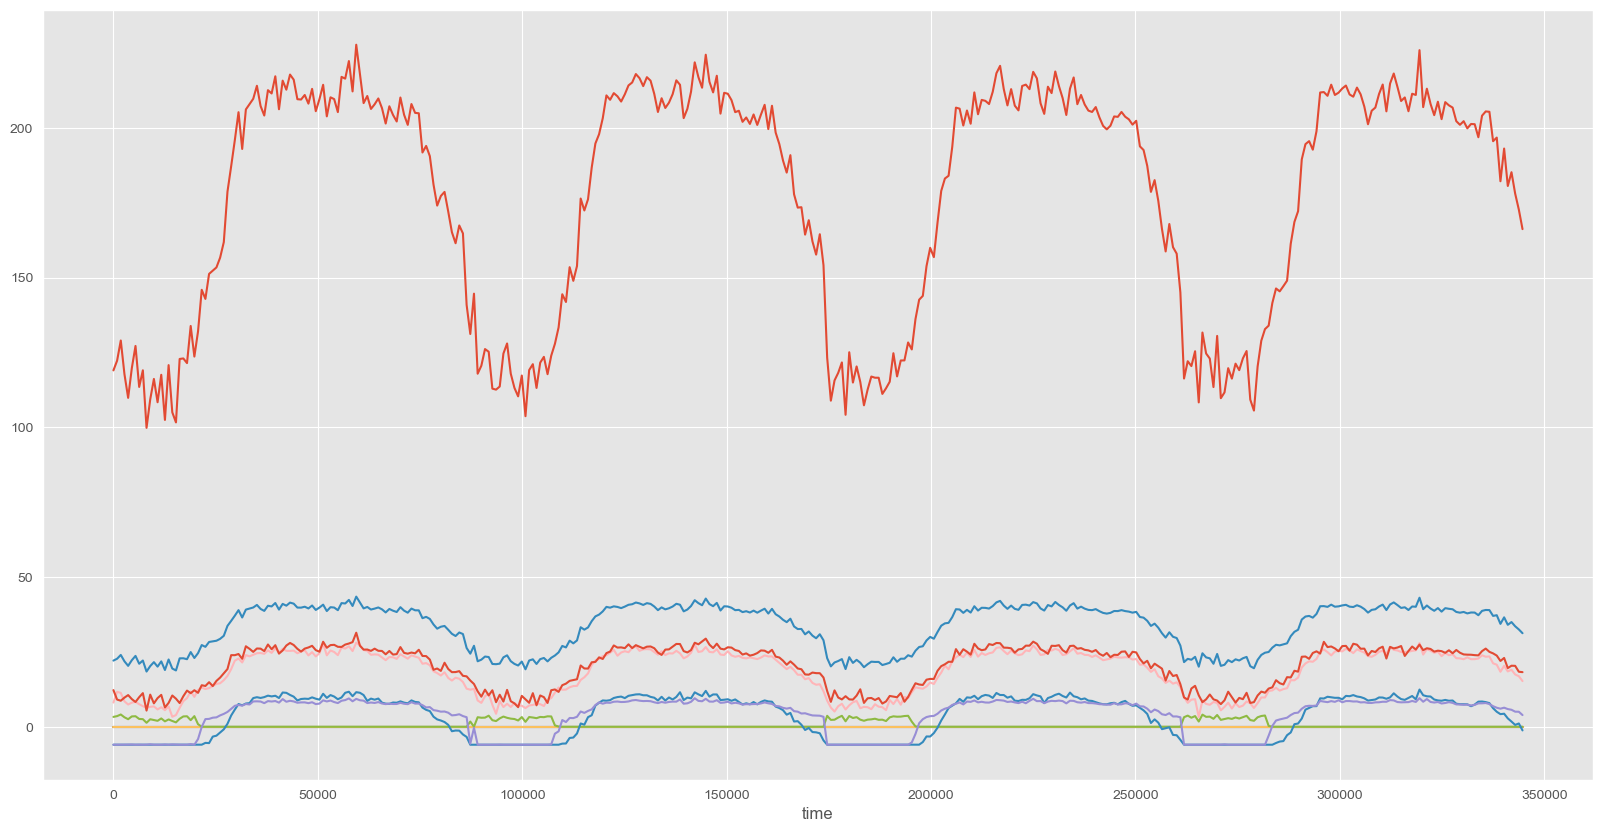

In [24]:
# Plot the output matrix as lines
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20, 10))

_ = OPF_output_PgQg.iloc[:24 * 4 * 4, :].plot(legend=False, ax=ax)

In [25]:
# Save the output as a csv file
output_path = processed_data_folder / "output_all_simulations_1.csv"
OPF_output_PgQg.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_all_simulations_1.npy"
np.save(output_path, OPF_output_PgQg.values)

# Save the description of the output function
description_path = processed_data_folder / "description_output_all_simulations_1.txt"
with open(description_path, "w") as f:
    f.write(description)

## Output - Active power and voltage magnitude of the buses (Option 2)

In [5]:
class BBM_single_output_2:
    def __init__(self):
        self.description = """The output is the part of the state that contains the active power and voltage magnitude of the buses, i.e., those columns that have 'V' or 'Pg' in their name.
The output has the form Y = [V1, V2, ..., VN, Pg1, Pg2, ..., PgN].
        """

    def __call__(self, x: pd.DataFrame, plant: PG.PowerGrid):
        """
        Returns the output of the BBM given the state
        :param x: the state dataframe
        :return:
        """
        # Get the voltage magnitudes of the buses
        V = x.loc[:, x.columns.str.contains("V")]

        # Get the indices of generators with a max rating of active power different from 0 (i.e., not synchronous condensers)
        PV_generators_idx = plant.gen.loc[plant.gen.max_p_mw != 0].index
        PV_generators_bus = plant.gen.iloc[PV_generators_idx].bus

        # Now, the indices of generators with max rating of active power equal to 0 (i.e., synchronous condensers)
        sc_generators_idx = plant.gen.loc[plant.gen.max_p_mw == 0].index
        sc_generators_bus = plant.gen.iloc[sc_generators_idx].bus

        # In V, keep only the voltage magnitudes of the generators
        V_PV = V.iloc[:, PV_generators_bus]

        # Get the active power of the generators, apply the indices obtained above
        Pg = x.loc[:, x.columns.str.contains("Pg")]
        Pg = Pg.iloc[:, PV_generators_idx]

        # Get the voltage magnitudes of the synchronous condensers
        V_sc = V.iloc[:, sc_generators_bus]

        # Concatenate
        y = pd.concat((Pg, V_PV, V_sc), axis=1)

        return y

In [6]:
# Obtain a single output
OPF_output_VPg_df = BBM_single_output_2()(sim_x_df, plant)
OPF_output_VPg_df.head()

,Pg,Pg.1,V,V.1,V.2,V.5,V.7
0,119.042074,22.097926,1.058203,1.043453,1.023394,1.059999,1.040795
900,122.292513,22.721510,1.059300,1.044210,1.023073,1.059999,1.038228
1800,129.017916,23.992108,1.057842,1.041923,1.020314,1.059999,1.035953
2700,117.756178,21.853135,1.056377,1.041820,1.022026,1.059999,1.036544
3600,109.866263,20.343933,1.054923,1.041433,1.023567,1.059999,1.038026


In [50]:
# Save the output as a csv file
output_path = processed_data_folder / "output_single_example_2.csv"
OPF_output_VPg_df.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_single_example_2.npy"
np.save(output_path, OPF_output_VPg_df.values)

In [51]:
# Run the function
OPF_output_VPg, description = BBM_all_outputs(data_folder, BBM_single_output_2, plant=plant)

# Print the shape of the output matrix
print(f"Output shape: {OPF_output_VPg.shape}")

100%|██████████| 615/615 [00:08<00:00, 76.00it/s]

Output shape: (59620, 7)


In [52]:
OPF_output_VPg.head()

,Pg,Pg.1,V,V.1,V.2,V.5,V.7
time,,,,,,,
0,119.042074,22.097926,1.058203,1.043453,1.023394,1.059999,1.040795
900,122.292513,22.721510,1.059300,1.044210,1.023073,1.059999,1.038228
1800,129.017916,23.992108,1.057842,1.041923,1.020314,1.059999,1.035953
2700,117.756178,21.853135,1.056377,1.041820,1.022026,1.059999,1.036544
3600,109.866263,20.343933,1.054923,1.041433,1.023567,1.059999,1.038026


In [1]:
# Save the output as a csv file
output_path = processed_data_folder / "output_all_simulations_2.csv"
OPF_output_VPg.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_all_simulations_2.npy"
np.save(output_path, OPF_output_VPg.values)

# Save the description of the output function
description_path = processed_data_folder / "description_output_all_simulations_2.txt"
with open(description_path, "w") as f:
    f.write(description)

NameError: name 'processed_data_folder' is not defined

## Output - Voltage angles + Option 2 (Option 3)

In [19]:
class BBM_single_output_3:
    def __init__(self):
        self.description = """The output is the part of the state that contains the voltage angles and active power of the buses, i.e., those columns that have 'Va' or 'Pg' in their name.
The output has the form Y = [Va1, Va2, ..., VaN, Pg1, Pg2, ..., PgN].
        """
    @staticmethod
    def run(x: pd.DataFrame, plant: PG.PowerGrid):
        """
        Returns the output of the BBM given the state
        :param x:
        :param plant:
        :return:
        """
        # Get the indices of generators with a max rating of active power different from 0 (i.e., not synchronous condensers)
        PV_generators_idx = plant.gen.loc[plant.gen.max_p_mw != 0].index

        # Get the angles of such generators
        Va = x.loc[:, x.columns.str.contains("phi")]
        Va = Va.iloc[:, PV_generators_idx]

        # Get the output from Option 2
        y = BBM_single_output_2()(x, plant)

        # Concatenate
        y = pd.concat((Va, y), axis=1)

        return y

    @staticmethod
    def normalize(y, plant):
        """
        Normalizes the output
        :param y:
        :param plant:
        :return:
        """
        # copy the output
        y = y.copy()

        # Turn the angle into radians using numpy
        angle_cols = y.columns.str.contains("phi")
        y.loc[:, angle_cols] = np.deg2rad(y.loc[:, angle_cols])

        # Get the calumns of generators, i.e., 'Pg', 'Pg.1', 'Pg.2', ... The index is 0 for Pg, 1 for Pg.1, 2 for Pg.2, etc.
        generator_cols = y.columns.str.contains("Pg")

        # Get the index of the generators from the column names
        generator_idx = [int(x.split(".")[-1]) if x != "Pg" else 0 for x in y.columns[generator_cols]]

        # Get maximum ratings of active power of the generators
        max_p_mw = plant.gen.loc[generator_idx, "max_p_mw"].values

        # Normalize the active power of the generators
        y.loc[:, generator_cols] = y.loc[:, generator_cols] / max_p_mw

        return y

In [21]:
# Obtain a single output
OPF_output_VaPg_df = BBM_single_output_3.run(sim_x_df, plant)
OPF_output_VaPg_df.head()

,phi,phi.1,Pg,Pg.1,V,V.1,V.2,V.5,V.7
0,0.0,-2.449307,119.042074,22.097926,1.058203,1.043453,1.023394,1.059999,1.040795
900,0.0,-2.518611,122.292513,22.721510,1.059300,1.044210,1.023073,1.059999,1.038228
1800,0.0,-2.643894,129.017916,23.992108,1.057842,1.041923,1.020314,1.059999,1.035953
2700,0.0,-2.424513,117.756178,21.853135,1.056377,1.041820,1.022026,1.059999,1.036544
3600,0.0,-2.251990,109.866263,20.343933,1.054923,1.041433,1.023567,1.059999,1.038026


In [22]:
# Normalize the output
OPF_output_VaPg_df_normalized = BBM_single_output_3.normalize(OPF_output_VaPg_df, plant)
OPF_output_VaPg_df_normalized.head()

,phi,phi.1,Pg,Pg.1,V,V.1,V.2,V.5,V.7
0,0.0,-0.042748,0.358129,0.157842,1.058203,1.043453,1.023394,1.059999,1.040795
900,0.0,-0.043958,0.367908,0.162296,1.059300,1.044210,1.023073,1.059999,1.038228
1800,0.0,-0.046145,0.388141,0.171372,1.057842,1.041923,1.020314,1.059999,1.035953
2700,0.0,-0.042316,0.354260,0.156094,1.056377,1.041820,1.022026,1.059999,1.036544
3600,0.0,-0.039305,0.330524,0.145314,1.054923,1.041433,1.023567,1.059999,1.038026


In [14]:
# Save the output as a csv file
output_path = processed_data_folder / "output_single_example_3.csv"
OPF_output_VaPg_df.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_single_example_3.npy"
np.save(output_path, OPF_output_VaPg_df.values)

In [23]:
# Save the normalized output as a csv file
output_path = processed_data_folder / "output_single_example_3_normalized.csv"
OPF_output_VaPg_df_normalized.to_csv(output_path)

# Save the normalized output as a numpy array
output_path = processed_data_folder / "output_single_example_3_normalized.npy"
np.save(output_path, OPF_output_VaPg_df_normalized.values)

In [64]:
# Run the function
OPF_output_VaPg, description = BBM_all_outputs(data_folder, BBM_single_output_3, plant=plant)

# Print the shape of the output matrix
print(f"Output shape: {OPF_output_VaPg.shape}")

In [10]:
# Save the output as a csv file
output_path = processed_data_folder / "output_all_simulations_3.csv"
OPF_output_VaPg.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_all_simulations_3.npy"
np.save(output_path, OPF_output_VaPg.values)

# Save the description of the output function
description_path = processed_data_folder / "description_output_all_simulations_3.txt"
with open(description_path, "w") as f:
    f.write(description)

NameError: name 'OPF_output_VaPg' is not defined

In [24]:
OPF_output_VaPg = pd.read_csv(processed_data_folder / "output_all_simulations_3.csv", index_col=0)
OPF_output_VaPg.head()

,phi,phi.1,Pg,Pg.1,V,V.1,V.2,V.5,V.7
time,,,,,,,,,
0,0.0,-2.449307,119.042074,22.097926,1.058203,1.043453,1.023394,1.059999,1.040795
900,0.0,-2.518611,122.292513,22.721510,1.059300,1.044210,1.023073,1.059999,1.038228
1800,0.0,-2.643894,129.017916,23.992108,1.057842,1.041923,1.020314,1.059999,1.035953
2700,0.0,-2.424513,117.756178,21.853135,1.056377,1.041820,1.022026,1.059999,1.036544
3600,0.0,-2.251990,109.866263,20.343933,1.054923,1.041433,1.023567,1.059999,1.038026


In [25]:
OPF_output_VaPg_normalized = BBM_single_output_3.normalize(OPF_output_VaPg, plant)
OPF_output_VaPg_normalized.head()

,phi,phi.1,Pg,Pg.1,V,V.1,V.2,V.5,V.7
time,,,,,,,,,
0,0.0,-0.042748,0.358129,0.157842,1.058203,1.043453,1.023394,1.059999,1.040795
900,0.0,-0.043958,0.367908,0.162296,1.059300,1.044210,1.023073,1.059999,1.038228
1800,0.0,-0.046145,0.388141,0.171372,1.057842,1.041923,1.020314,1.059999,1.035953
2700,0.0,-0.042316,0.354260,0.156094,1.056377,1.041820,1.022026,1.059999,1.036544
3600,0.0,-0.039305,0.330524,0.145314,1.054923,1.041433,1.023567,1.059999,1.038026


In [59]:
# Get th ephi column, then get the rows where phi is not zero
phi = OPF_output_VaPg_normalized.loc[:, "phi"]
phi_nonzero = phi[phi != 0]
phi.shape

(59620,)

In [26]:
# Save the normalized output as a csv file
output_path = processed_data_folder / "output_all_simulations_3_normalized.csv"
OPF_output_VaPg_normalized.to_csv(output_path)

# Save the normalized output as a numpy array
output_path = processed_data_folder / "output_all_simulations_3_normalized.npy"
np.save(output_path, OPF_output_VaPg_normalized.values)